# Mental Health Support Survey Data Analysis

## Introduction
In this analysis, we are working with a dataset that captures survey responses related to the current state of mental health support at various universities. The dataset includes both quantitative (e.g., mental health ratings) and qualitative (e.g., suggestions for improvement) data, allowing us to explore the distribution of responses and extract insights into how students perceive the mental health resources provided by their institutions.

The survey touches upon several important aspects, including:
- **Gender and Field of Study**: Demographic details of the respondents.
- **Current State of Mental Health Support**: Ratings on a scale of 1 to 5.
- **Concerns about AI-powered mental health applications**: Respondents' concerns about privacy, misinformation, and other issues.
- **Suggestions for Improving Mental Health Support**: Open-ended feedback from respondents on how universities can improve their mental health resources.

## Objective
The goal of this analysis is to perform both qualitative and quantitative analysis of the data. We aim to:
1. Understand the demographic distribution of respondents, including their gender and field of study.
2. Analyze the distribution of mental health support ratings to evaluate the general satisfaction level among students.
3. Examine common concerns related to AI-powered mental health companion applications.
4. Explore and categorize the suggestions provided by respondents for improving mental health support.
5. Generate meaningful visualizations to represent the key findings and patterns in the data.

## Qualitative Analysis Techniques
The qualitative analysis methods applied in this notebook include:
- **Thematic analysis**: Grouping responses based on recurring themes or topics, especially for open-ended text responses such as concerns and suggestions.
- **Sentiment analysis**: Using NLP tools to determine the emotional tone of the textual feedback.
- **Categorization**: Manually classifying suggestions into broader categories for better understanding.
- **Word Cloud Visualization**: Creating visual representations of the most frequent terms in respondents' feedback to identify important themes.
- **Cross-tabulation**: Comparing different demographic groups to see how their responses vary.

Through this analysis, we aim to extract actionable insights into how universities can better support the mental health of their students.


In [82]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# load data
data = pd.read_csv('mental_health.csv')

# check the first few rows of the data
data.head()

,Timestamp,Please tick the checkbox below as a way of providing informed consent for us to utilize your answers in the project.,What is your gender?,What is your field of study?,What is your year of study?,"On a scale of 1-5, how would you rate the current state of mental health support at your university?",Have you ever utilized the mental health care services offered at your university?,"If yes, how satisfied were you with the services offered?",What mental health challenges do you or your peers commonly face? (Pick the top three),How comfortable do you feel discussing Mental Health issues with: [Friends],How comfortable do you feel discussing Mental Health issues with: [Family],How comfortable do you feel discussing Mental Health issues with: [University staff],How comfortable do you feel discussing Mental Health issues with: [Professional counselors],"What barriers, if any, have you experienced in accessing mental health support?",What methods or activities do you use to maintain your mental health?,How comfortable would you feel using a mental health companion software application powered by Artificial Intelligence?,What features would you find helpful in a mental health companion software application powered by Artificial Intelligence? (Select your top three),"What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?","In your opinion, how can universities improve mental health support for students?",Any additional comments or suggestions regarding mental health support in universities?
0,2024/09/15 2:22:56 pm GMT+3,I give you my consent,Female,"Engineering, Art & Design",4th Year,2 - Poor,No,NaN,Stress;Anxiety;Financial concerns,Very comfortable,Somewhat uncomfortable,Neutral,Very comfortable,I have never looked for mental health support ...,Social support;In most cases I prefer chatting...,5 - Very Comfortable,Personalized coping strategies;Connection to p...,Privacy;Incorrect mental health information,By creating awareness about how mental health ...,Currently at Makerere many students face menta...
1,2024/09/15 2:29:02 pm GMT+3,I give you my consent,Male,Information technology (IT),4th Year,2 - Poor,No,NaN,Anxiety;Academic pressure;Financial concerns,Neutral,Very uncomfortable,Very uncomfortable,Neutral,Lack of awareness about available resources;Fi...,Exercise;Social support,3 - Neutral,Daily mood tracking;Connection to professional...,Privacy,NaN,NaN
2,2024/09/15 6:19:10 pm GMT+3,I give you my consent,Female,"Engineering, Art & Design",4th Year,3 - Fair,No,NaN,Stress;Academic pressure;Financial concerns,Very comfortable,Very uncomfortable,Very uncomfortable,Somewhat comfortable,Stigma surrounding mental health;Lack of aware...,Exercise;Social support,5 - Very Comfortable,Daily mood tracking;Connection to professional...,Privacy;Incorrect mental health information,NaN,NaN
3,2024/09/17 10:02:28 am GMT+3,I give you my consent,Male,Information Technology (IT),2nd Year,3 - Fair,No,2 - Not Satisfied,Stress;Academic pressure;Financial concerns,Very comfortable,Very comfortable,Very comfortable,Very comfortable,Long wait times;Limited availability of counse...,Exercise,5 - Very Comfortable,Daily mood tracking;Personalized coping strate...,Privacy,Putting up systems that highly engage students...,Eager to seee the system
4,2024/09/17 10:07:05 am GMT+3,I give you my consent,Male,Information Technology (IT),1st Year,4 - Good,No,NaN,Stress;Academic pressure;Financial concerns,Very comfortable,Very comfortable,Somewhat comfortable,Very comfortable,Lack of awareness about available resources;Fi...,Exercise;Social support,5 - Very Comfortable,Daily mood tracking;Educational resources on m...,Privacy,By availing such AI apps and also availing inf...,Its actually a great aspect of life because ma...


In [84]:
# get the shape of the data
data.shape

(204, 20)

In [85]:
# Filter the dataframe to use rows after index 100
filtered_data = data.iloc[100:]

df = filtered_data

# Display the first few rows of the filtered data
df.head()

,Timestamp,Please tick the checkbox below as a way of providing informed consent for us to utilize your answers in the project.,What is your gender?,What is your field of study?,What is your year of study?,"On a scale of 1-5, how would you rate the current state of mental health support at your university?",Have you ever utilized the mental health care services offered at your university?,"If yes, how satisfied were you with the services offered?",What mental health challenges do you or your peers commonly face? (Pick the top three),How comfortable do you feel discussing Mental Health issues with: [Friends],How comfortable do you feel discussing Mental Health issues with: [Family],How comfortable do you feel discussing Mental Health issues with: [University staff],How comfortable do you feel discussing Mental Health issues with: [Professional counselors],"What barriers, if any, have you experienced in accessing mental health support?",What methods or activities do you use to maintain your mental health?,How comfortable would you feel using a mental health companion software application powered by Artificial Intelligence?,What features would you find helpful in a mental health companion software application powered by Artificial Intelligence? (Select your top three),"What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?","In your opinion, how can universities improve mental health support for students?",Any additional comments or suggestions regarding mental health support in universities?
100,2024/10/02 9:01:41 pm GMT+3,I give you my consent,Male,Information Technology (IT),2nd Year,1 - Very poor,No,1 - Disappointed,Stress;Depression;Academic pressure,Very uncomfortable,Very comfortable,Very uncomfortable,Very uncomfortable,Long wait times;Limited availability of counse...,Social support,4 - Somewhat Comfortable,Meditation and mindfulness exercises;Anonymous...,Privacy,NaN,NaN
101,2024/10/02 9:01:45 pm GMT+3,I give you my consent,Female,"Engineering, Art & Design",4th Year,3 - Fair,No,NaN,Stress;Depression;Financial concerns,Somewhat uncomfortable,Neutral,Very uncomfortable,Very uncomfortable,Lack of awareness about available resources;Fi...,Social support;Pray,3 - Neutral,Daily mood tracking;Connection to professional...,Privacy,Create forums for students to exchange concerns,NaN
102,2024/10/02 9:06:46 pm GMT+3,I give you my consent,Male,Information Technology (IT),3rd Year,2 - Poor,No,NaN,Stress;Academic pressure;Financial concerns,Somewhat comfortable,Very uncomfortable,Somewhat uncomfortable,Very comfortable,Stigma surrounding mental health;Financial con...,Meditation or mindfulness;,3 - Neutral,Daily mood tracking;Meditation and mindfulness...,Privacy,Create access points for mental health support...,NaN
103,2024/10/07 5:57:10 pm GMT+3,I give you my consent,Female,statistics,2nd Year,3 - Fair,No,NaN,Anxiety;Loneliness;Academic pressure,Somewhat comfortable,Very uncomfortable,Very uncomfortable,Very uncomfortable,Lack of awareness about available resources,Social support,3 - Neutral,Daily mood tracking;Connection to professional...,Privacy,NaN,NaN
104,2024/10/07 5:57:33 pm GMT+3,I give you my consent,Male,Statistics,2nd Year,1 - Very poor,No,NaN,Stress;Academic pressure;Financial concerns,Somewhat uncomfortable,Somewhat uncomfortable,Somewhat comfortable,Somewhat uncomfortable,Stigma surrounding mental health,Social support,5 - Very Comfortable,Daily mood tracking;Meditation and mindfulness...,Privacy;Incorrect mental health information,Make psychology consellors available,NaN


In [86]:
# Gender distribution
gender_distribution = df['What is your gender?'].value_counts()
print("Gender Distribution:\n", gender_distribution)


Gender Distribution:
 What is your gender?
Male      55
Female    49
Name: count, dtype: int64


In [87]:
# Field of Study distribution
field_of_study_distribution = df['What is your field of study?'].value_counts()
print("\nField of Study Distribution:\n", field_of_study_distribution)


Field of Study Distribution:
 What is your field of study?
Engineering, Art & Design                26
Health Sciences                          17
Business related                         12
Information Technology (IT)               5
Education                                 5
Law                                       5
Business                                  5
Business                                  4
Agriculture and Environmental Studies     3
Natural Sciences                          3
Education                                 2
Bachelors of commerce                     2
Accounts                                  1
Bachelor of commerce                      1
Statistics                                1
statistics                                1
Commerce accounting                       1
Arts with Education                       1
BAED                                      1
Arts in education                         1
Bachelor of Commerce                      1
Statistics      

In [88]:
# Mental Health Rating distribution
mental_health_rating_distribution = df['On a scale of 1-5, how would you rate the current state of mental health support at your university?'].value_counts()
print("\nMental Health Rating Distribution:\n", mental_health_rating_distribution)


Mental Health Rating Distribution:
 On a scale of 1-5, how would you rate the current state of mental health support at your university?
3 - Fair         52
2 - Poor         25
4 - Good         17
1 - Very poor     9
5 - Very good     1
Name: count, dtype: int64


In [89]:
# Concerns about AI mental health companion apps
concerns_about_ai = df['What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?'].value_counts()
print("\nConcerns About AI Apps:\n", concerns_about_ai)


Concerns About AI Apps:
 What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?
Privacy                                                                                                                                                                                                                      61
Privacy;Incorrect mental health information                                                                                                                                                                                  21
Incorrect mental health information                                                                                                                                                                                          14
Incorrect mental health information;Over stated responses and confusion                                                                                                  

In [90]:
# Sample Suggestions for improving mental health support
suggestions_non_null = df['In your opinion, how can universities improve mental health support for students?'].dropna()
print("\nSample Suggestions for Improving Mental Health Support:\n", suggestions_non_null.head(5))


Sample Suggestions for Improving Mental Health Support:
 101     Create forums for students to exchange concerns 
102    Create access points for mental health support...
104                Make psychology consellors available 
105               More medical personnel and counselors 
106                                Financial assistance 
Name: In your opinion, how can universities improve mental health support for students?, dtype: object


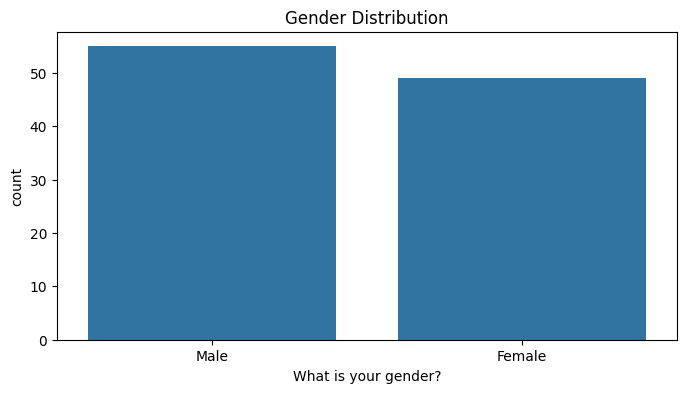

In [91]:
# Gender Distribution Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='What is your gender?', data=df)
plt.title('Gender Distribution')
plt.show()

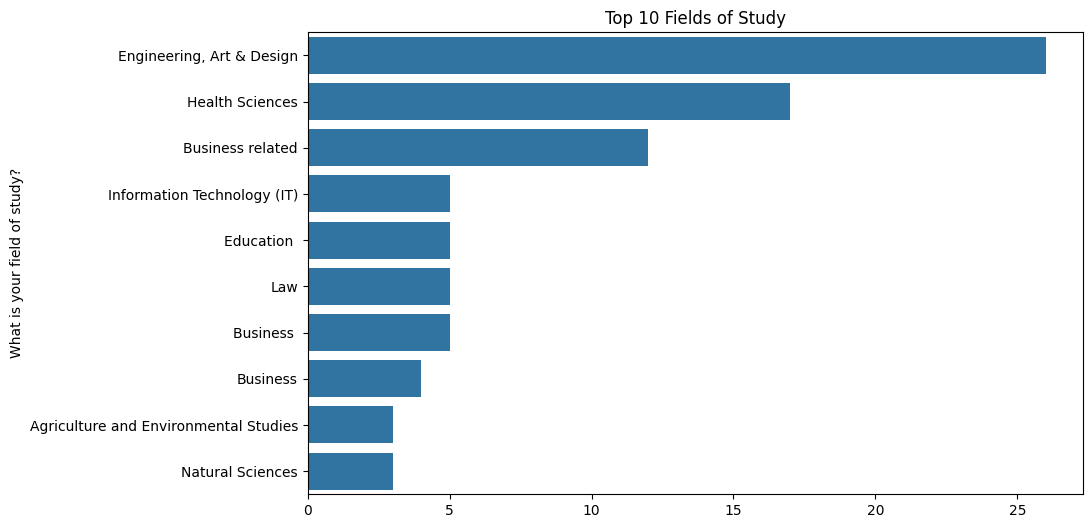

In [92]:
# Field of Study Distribution Plot (Top 10 fields)
plt.figure(figsize=(10, 6))
top_fields = field_of_study_distribution.head(10)
sns.barplot(y=top_fields.index, x=top_fields.values, orient='h')
plt.title('Top 10 Fields of Study')
plt.show()

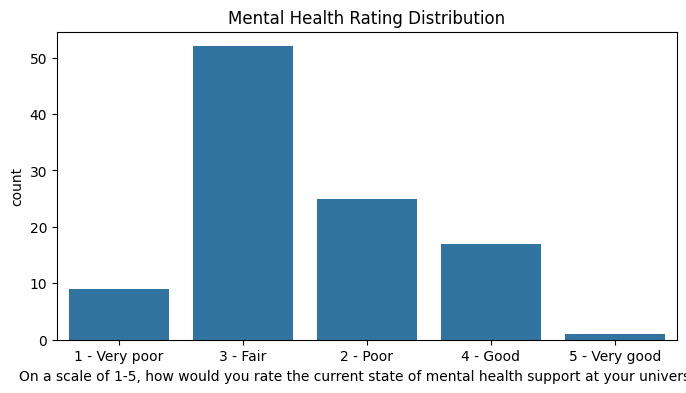

In [93]:
# Mental Health Rating Distribution Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='On a scale of 1-5, how would you rate the current state of mental health support at your university?', data=df)
plt.title('Mental Health Rating Distribution')
plt.show()

In [94]:
# Thematic analysis
from collections import Counter

# Extract all non-null suggestions
suggestions = df['In your opinion, how can universities improve mental health support for students?'].dropna()

# Join all the suggestions together
all_suggestions_text = ' '.join(suggestions)

# Split the text into words and count the frequency of each word
word_counts = Counter(all_suggestions_text.split())

# Display the most common words (excluding common stop words)
common_words = word_counts.most_common(20)
print("Most Common Words in Suggestions:\n", common_words)


Most Common Words in Suggestions:
 [('health', 35), ('students', 34), ('mental', 33), ('the', 32), ('and', 31), ('to', 29), ('of', 21), ('awareness', 20), ('By', 16), ('in', 15), ('more', 15), ('services', 10), ('available', 9), ('about', 9), ('with', 9), ('support', 8), ('should', 8), ('counselors', 7), ('that', 7), ('Making', 7)]


In [95]:
# Sentiment analysis
from textblob import TextBlob

# Analyzing sentiment for AI concerns
df['AI Concerns Sentiment'] = df['What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few sentiment scores
print(df[['What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?', 'AI Concerns Sentiment']].head())


    What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?  \
100                                            Privacy                                                                                     
101                                            Privacy                                                                                     
102                                            Privacy                                                                                     
103                                            Privacy                                                                                     
104        Privacy;Incorrect mental health information                                                                                     

     AI Concerns Sentiment  
100                    0.0  
101                    0.0  
102                    0.0  
103                    0.0  
104           

C:\Users\COLIN MARK\AppData\Local\Temp\ipykernel_63284\394753172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AI Concerns Sentiment'] = df['What concerns, if any, would you have about using a mental health companion software application powered by Artificial Intelligence?'].dropna().apply(lambda x: TextBlob(x).sentiment.polarity)


In [96]:
# Categorization
# Categorize suggestions manually by matching keywords
def categorize_suggestion(text):
    if 'awareness' in text.lower():
        return 'Increase Awareness'
    elif 'counselor' in text.lower():
        return 'More Counselors'
    elif 'resources' in text.lower():
        return 'Better Resources'
    else:
        return 'Other'

df['Suggestion Category'] = df['In your opinion, how can universities improve mental health support for students?'].dropna().apply(categorize_suggestion)

# Display category counts
print(df['Suggestion Category'].value_counts())


Suggestion Category
Other                 58
Increase Awareness    22
More Counselors        7
Better Resources       4
Name: count, dtype: int64


C:\Users\COLIN MARK\AppData\Local\Temp\ipykernel_63284\560997247.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suggestion Category'] = df['In your opinion, how can universities improve mental health support for students?'].dropna().apply(categorize_suggestion)


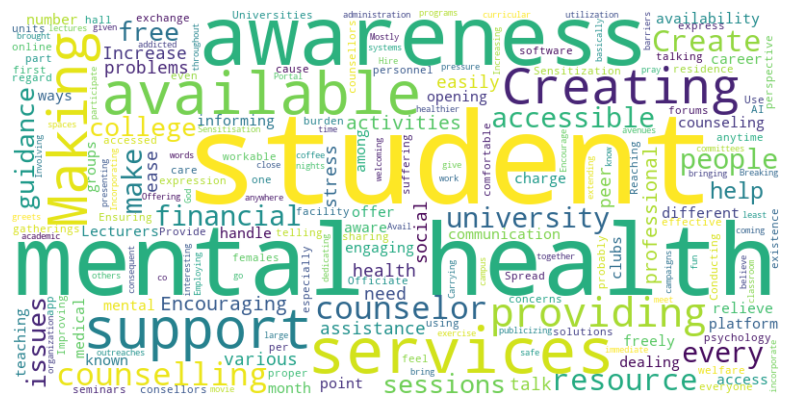

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the suggestions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_suggestions_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [98]:
# Cross-tabulation of Gender and Mental Health Rating
cross_tab = pd.crosstab(df['What is your gender?'], df['On a scale of 1-5, how would you rate the current state of mental health support at your university?'])
print(cross_tab)


On a scale of 1-5, how would you rate the current state of mental health support at your university?  1 - Very poor  \
What is your gender?                                                                                                  
Female                                                                                                            4   
Male                                                                                                              5   

On a scale of 1-5, how would you rate the current state of mental health support at your university?  2 - Poor  \
What is your gender?                                                                                             
Female                                                                                                      14   
Male                                                                                                        11   

On a scale of 1-5, how would you rate the current state of mental 

In [99]:
# Convert the mental health rating column to numeric
df['Mental Health Rating'] = pd.to_numeric(df['On a scale of 1-5, how would you rate the current state of mental health support at your university?'], errors='coerce')

# Group by Field of Study and get the mean mental health rating
group_by_field = df.groupby('What is your field of study?')['Mental Health Rating'].mean()
print(group_by_field.sort_values(ascending=False))


What is your field of study?
Accounts                                NaN
Agriculture and Environmental Studies   NaN
Arts in education                       NaN
Arts with Education                     NaN
BAED                                    NaN
Bachelor of Commerce                    NaN
Bachelor of commerce                    NaN
Bachelors of commerce                   NaN
Business                                NaN
Business                                NaN
Business related                        NaN
Commerce accounting                     NaN
Education                               NaN
Education                               NaN
Engineering, Art & Design               NaN
Health Sciences                         NaN
Information Technology (IT)             NaN
Law                                     NaN
Natural Sciences                        NaN
Not a student                           NaN
Social Work                             NaN
Social work                             NaN
Soc

C:\Users\COLIN MARK\AppData\Local\Temp\ipykernel_63284\3654423486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mental Health Rating'] = pd.to_numeric(df['On a scale of 1-5, how would you rate the current state of mental health support at your university?'], errors='coerce')
